# Breast Cancer EDA📊 + Predictive Modelling🎮

![Breast Cancer](https://www.nationalbreastcancer.org/wp-content/uploads/breast-cancer-facts-what-is-breast-cancer.jpeg)

Dataset Description

The Breast Cancer datasets is available UCI machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells.

The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively. The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

* 1= Malignant (Cancerous) - Present (M)
* 0= Benign (Not Cancerous) - Absent (B)


Column names and meanings:

* id: ID number
* diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)
* radius_mean: mean of distances from center to points on the perimeter
* texture_mean: standard deviation of gray-scale values
* perimeter_mean: mean size of the core tumor
* area_mean: area of the tumor
* smoothness_mean: mean of local variation in radius lengths
* compactness_mean: mean of perimeter^2 / area - 1.0
* concavity_mean: mean of severity of concave portions of the contour
* concave_points_mean: mean for number of concave portions of the contour
* symmetry_mean
* fractal_dimension_mean: mean for "coastline approximation" - 1
* radius_se: standard error for the mean of distances from center to points on the perimeter
* texture_se: standard error for standard deviation of gray-scale values
* perimeter_se
* area_se
* smoothness_se: standard error for local variation in radius lengths
* compactness_se: standard error for perimeter^2 / area - 1.0
* concavity_se: standard error for severity of concave portions of the contour
* concave_points_se: standard error for number of concave portions of the contour
* symmetry_se
* fractal_dimension_se: standard error for "coastline approximation" - 1
* radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter
* texture_worst: "worst" or largest mean value for standard deviation of gray-scale values
* perimeter_worst
* area_worst
* smoothness_worst: "worst" or largest mean value for local variation in radius lengths
* compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0
* concavity_worst: "worst" or largest mean value for severity of concave portions of the contour
* concave_points_worst: "worst" or largest mean value for number of concave portions of the contour
* symmetry_worst
* fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

# Import Libraries 📚

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv
/kaggle/input/ocean2/ocean.css


In [2]:
from IPython.display import HTML
f = open("../input/ocean2/ocean.css").read()
HTML(f"<style>{f}</style>")

# Loading the Dataset.

### Clearing the useless columns.

In [3]:
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.drop(['Unnamed: 32','id'] ,axis=1, inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Checking the missing values in the dataset.

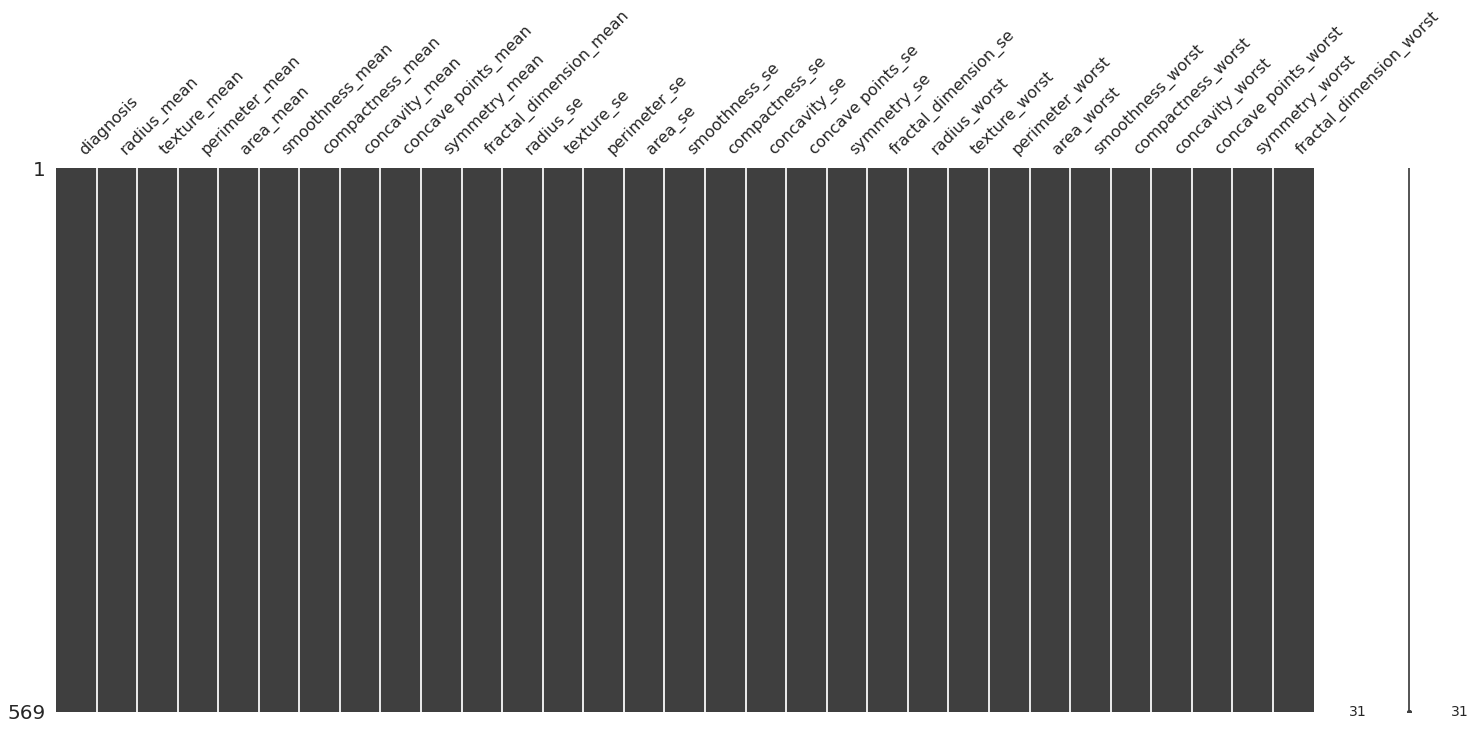

In [4]:
missingno.matrix(df)
plt.show()

### This shows that the dataset having 0 missing values.

## Checking the duplicate values in the dataset.

In [5]:
df.duplicated().sum()

0

### This shows that the dataset having 0 duplicate values.

## Describing the dataset.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# EDA (Exploratory Data Analysis)📊

## Let's check that, how the dataset is divided into two type of diagnosis.

Number of cells labeled Benign :  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


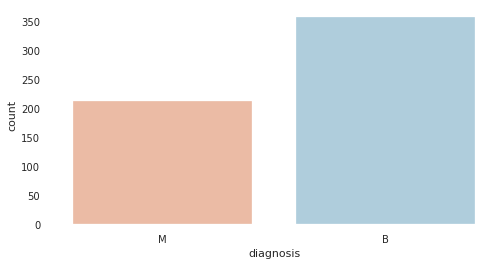

In [7]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df['diagnosis'], palette='RdBu')

benign, malignant = df['diagnosis'].value_counts()
print('Number of cells labeled Benign : ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(df) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(df) * 100, 2), '%')
plt.show()

### This plot shows that the Malignant (Cancerous) type result of diagnosis are 212. And This plot shows that the Benign (Not Cancerous) type result of diagnosis are 357.

## Let's check the correlation between the dataset.

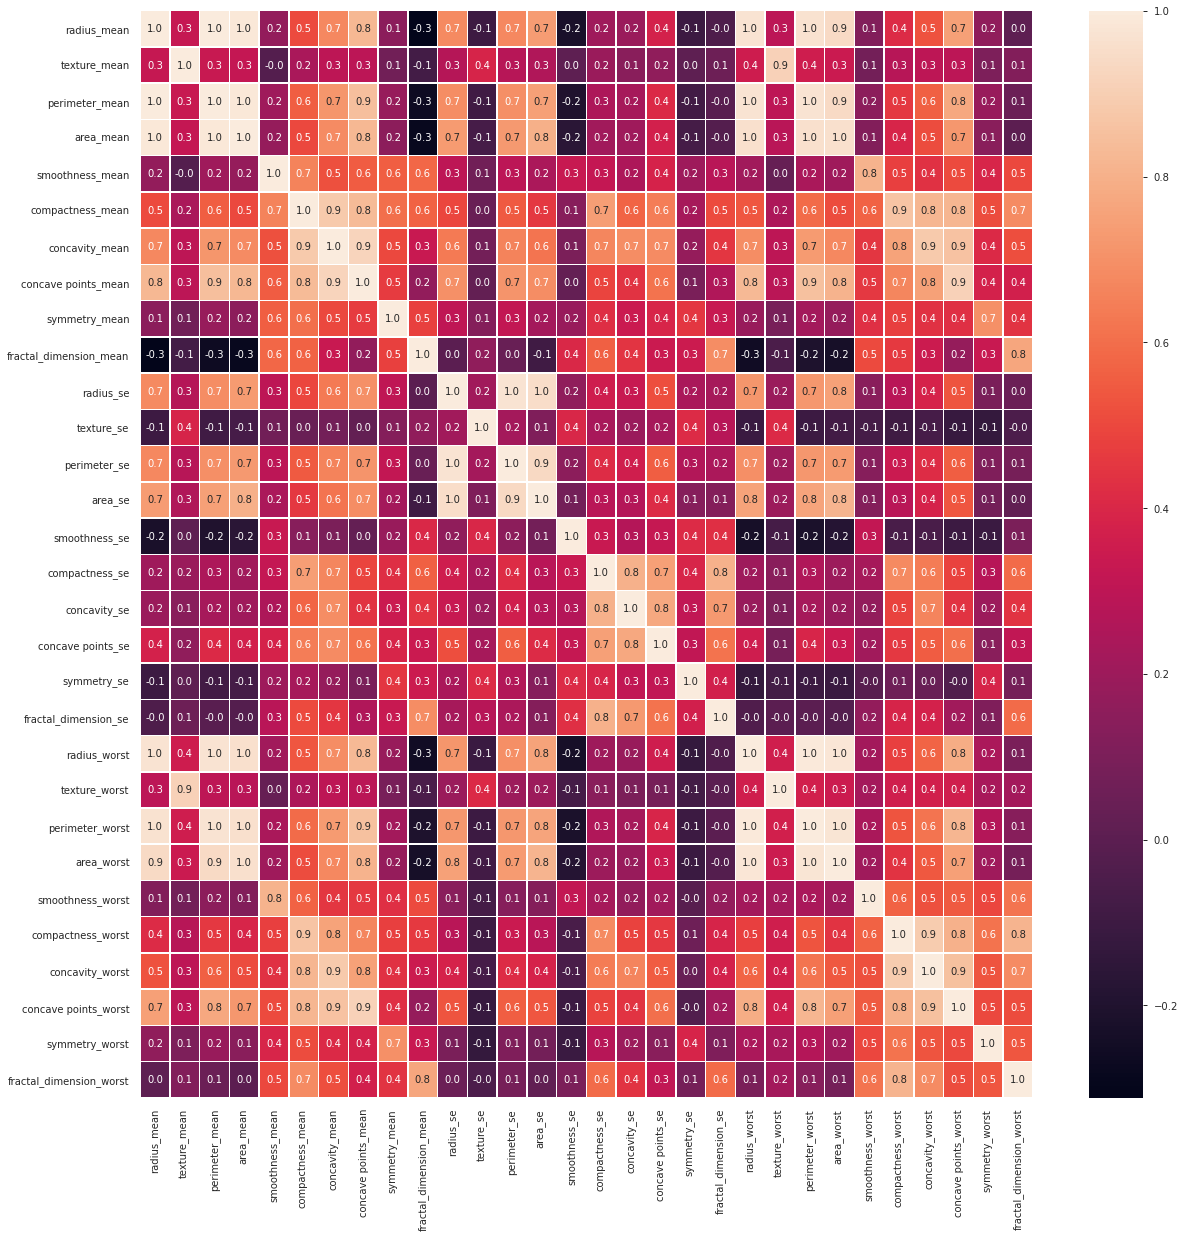

In [8]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### This correlation shows pretty much good relationship between dataset.

## Clustermapping the datasets correlation for better understanding the relationship of data.

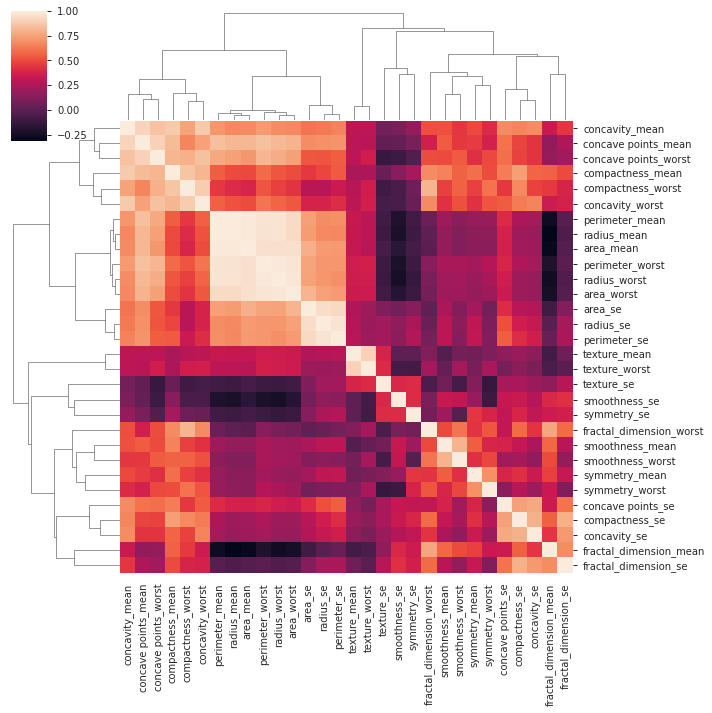

In [9]:
sns.clustermap(df.corr())
plt.show()

## Checking the relationship between the specific data for understanding the relationship.

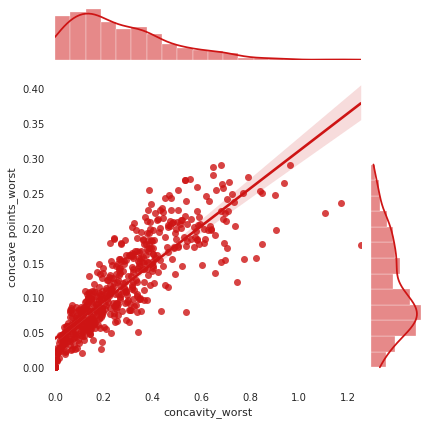

In [10]:
sns.jointplot(x=df.loc[:,'concavity_worst'], y=df.loc[:,'concave points_worst'], kind="reg", color="#ce1414")
plt.show()

# Predictive Modelling 🎮

### Let's get to know about the columns of the dataset. So, that we can know better about the features of our model.

In [11]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## We have categorical data, but our model needs something numerical. So, that our model works perfectly fine and predicts with best  accuracy.

In [12]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

### By mapping the Malignant diagnosis as 1 and Benign diagnosis as 0. We are making our dataset to be perfect fit for our model.

## Separating the features and the target value for our model.

In [13]:
X = df.drop(["diagnosis"], axis = 1)
y = df.diagnosis.values

## Preprocessing the feature values for better accuracy of the model.

In [14]:
X = (X - np.min(X))/(np.max(X) - np.min(X)).values
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


### Here, we separating the data in two parts - Training & Testing. Then we calling the Logistic Regression and fitting the data in our model. We predict the predictions and then checking the accuracy of our model.

Accuracy is:  0.9767441860465116


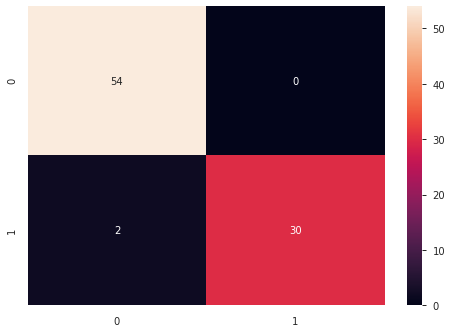

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

### We got the accuracy of 0.98% on our this Logistic Regression model.

## Checking the Classification Report for better understanding the accuracy and score of our model.

In [16]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.94      0.97        32

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



## Checking the roc_aur_score and the f1 score of our model.

In [17]:
print("roc_auc_score: ", roc_auc_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))

roc_auc_score:  0.96875
f1 score:  0.967741935483871
